In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
promise_zone = gpd.read_file('../data/MDHA_Promise_Zones/Export_Output_5.shp')
print(promise_zone.crs)
promise_zone.head(7 )

epsg:2274


,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe,geometry
0,1,1,1.053728e+08,49364.601403,"POLYGON ((1743366.812 678044.543, 1743367.698 ..."
1,2,2,7.670585e+07,45226.018917,"POLYGON ((1738690.545 661791.347, 1738733.644 ..."
2,3,3,2.985488e+08,75207.067487,"POLYGON ((1759602.544 668309.889, 1759640.155 ..."
3,4,4,2.713638e+08,74348.596054,"POLYGON ((1747799.003 654974.612, 1747821.293 ..."
4,5,5,3.928178e+08,106661.712102,"POLYGON ((1737013.744 692634.639, 1737122.605 ..."
5,6,6,9.535996e+07,59256.923574,"POLYGON ((1716935.654 667534.495, 1716992.481 ..."


In [15]:
promise_zone = promise_zone.to_crs(epsg = 4326)

In [4]:
promise_zone.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    6 non-null      int64   
 1   ZONE_ID     6 non-null      int64   
 2   SHAPE_STAr  6 non-null      float64 
 3   SHAPE_STLe  6 non-null      float64 
 4   geometry    6 non-null      geometry
dtypes: float64(2), geometry(1), int64(2)
memory usage: 368.0 bytes


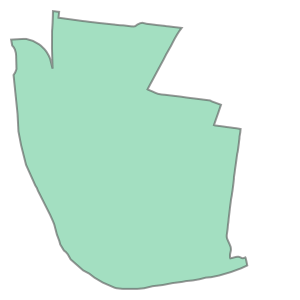

In [44]:
promise_zone.geometry[0]

In [45]:
promise_zone.head()

,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe,geometry
0,1,1,1.053728e+08,49364.601403,"POLYGON ((1743366.812 678044.543, 1743367.698 ..."
1,2,2,7.670585e+07,45226.018917,"POLYGON ((1738690.545 661791.347, 1738733.644 ..."
2,3,3,2.985488e+08,75207.067487,"POLYGON ((1759602.544 668309.889, 1759640.155 ..."
3,4,4,2.713638e+08,74348.596054,"POLYGON ((1747799.003 654974.612, 1747821.293 ..."
4,5,5,3.928178e+08,106661.712102,"POLYGON ((1737013.744 692634.639, 1737122.605 ..."


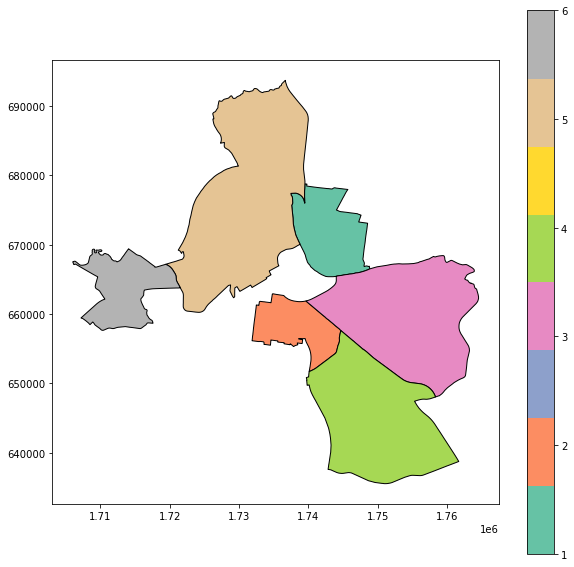

In [54]:
#geopandas handles legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Promise_Zone_id', 'loc': 'upper left', 
            'bbox_to_anchor': (1.05, 1.05)}

promise_zone.plot(column = 'ZONE_ID', figsize=(10, 10),
              edgecolor = 'black',
              legend = True,
              cmap = 'Set2')
plt.show()

In [7]:
bus_stops['geometry'] = bus_stops.apply(lambda x: Point((x.lng,x.lat)),
                                        axis=1)
bus_stops.head(3)

,stop,route,location,lat,lng,geometry
0,GREEN LN & WHITES CREEK PIKE WB,GOLDEN VALLEY,"(36.236249, -86.816722)",36.236249,-86.816722,POINT (-86.816722 36.236249)
1,_ 9TH AVE S & EDGEHILL AVE SB,8TH AVENUE SOUTH,"(36.142642, -86.780897)",36.142642,-86.780897,POINT (-86.780897 36.142642)
2,DONELSON/DELL STATION OUTBOUND,MURFREESBORO PIKE,"(36.105615, -86.672004)",36.105615,-86.672004,POINT (-86.672004 36.105615)


In [5]:
bus_stops = pd.read_csv('../data/busstops_cleaned.csv')
print(bus_stops.shape)
bus_stops.head(3)

(2524, 5)


,stop,route,location,lat,lng
0,GREEN LN & WHITES CREEK PIKE WB,GOLDEN VALLEY,"(36.236249, -86.816722)",36.236249,-86.816722
1,_ 9TH AVE S & EDGEHILL AVE SB,8TH AVENUE SOUTH,"(36.142642, -86.780897)",36.142642,-86.780897
2,DONELSON/DELL STATION OUTBOUND,MURFREESBORO PIKE,"(36.105615, -86.672004)",36.105615,-86.672004


In [17]:
bus_geo = gpd.GeoDataFrame(bus_stops, 
                           crs = promise_zone.crs, 
                           geometry = bus_stops['geometry'])

In [20]:
stops_by_zone = gpd.sjoin( bus_geo,promise_zone, op = 'within')

In [21]:
stops_by_zone.head()

,stop,route,location,lat,lng,geometry,index_right,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe
1,_ 9TH AVE S & EDGEHILL AVE SB,8TH AVENUE SOUTH,"(36.142642, -86.780897)",36.142642,-86.780897,POINT (-86.78090 36.14264),1,2,2,7.670585e+07,45226.018917
3,17TH AVE S & DOROTHY PL SB,BELMONT,"(36.137623, -86.795609)",36.137623,-86.795609,POINT (-86.79561 36.13762),1,2,2,7.670585e+07,45226.018917
5,WEDGEWOOD AVE & 18TH AVE S WB,UNIVERSITY CONNECTOR,"(36.137212, -86.796865)",36.137212,-86.796865,POINT (-86.79686 36.13721),1,2,2,7.670585e+07,45226.018917
53,WEDGEWOOD AVE & 17TH AVE S EB,UNIVERSITY CONNECTOR,"(36.136868, -86.795931)",36.136868,-86.795931,POINT (-86.79593 36.13687),1,2,2,7.670585e+07,45226.018917
61,WEDGEWOOD AVE & 16TH AVE WB,RIVERGATE EXPRESS,"(36.136319, -86.794443)",36.136319,-86.794443,POINT (-86.79444 36.13632),1,2,2,7.670585e+07,45226.018917


In [28]:
stops_by_zone['ZONE_ID'].value_counts()

5    366
3    177
1    127
2    110
4     84
6     50
Name: ZONE_ID, dtype: int64